# **CLUSTERING**

In [0]:
#import library yang dibutuhkan
from sklearn.cluster import KMeans
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load data file
dataset = pd.read_csv('dataWO_OutlierPriceOdo.csv') #file csv terbaru yang datanya sudah bersih dari missing value dan outliers
df = pd.DataFrame(dataset, columns=['price','year','condition'])
df

,price,year,condition
0,17899,2012.0,excellent
1,0,2016.0,excellent
2,0,2016.0,excellent
3,9500,2001.0,good
4,4600,2008.0,good
...,...,...,...
9781,11995,2017.0,like new
9782,18995,2019.0,excellent
9783,12000,2004.0,excellent
9784,11500,2017.0,like new


In [0]:
#periksa data apakah masih ada data missing
print(df.describe())
print(df.isnull().sum())

              price         year
count   9786.000000  9786.000000
mean    9966.563458  2008.753934
std     7133.065290     8.019875
min        0.000000  1917.000000
25%     4500.000000  2006.000000
50%     7995.000000  2010.000000
75%    14900.000000  2014.000000
max    29495.000000  2020.000000
price        0
year         0
condition    0
dtype: int64


In [0]:
X = df.iloc[:, 1].values
y = df.iloc[:, 2].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [0]:
#scalling dengan metode standard scale mengguanakan min dan max
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#scalling dengan minmax scaller
min_max_scaler =MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)

In [0]:
df.sort_values(by=['price','year']) #sorting fitur yang akan dipakai
df
#simpan fitur di variabel baru
data = df['price'].values
dataa = df['year'].values

In [0]:
#buat variabel untuk menyimpan fitur yang akan diklustering
X = np.array(df.iloc[:,[0,1]].values)
X

array([[17899.,  2012.],
       [    0.,  2016.],
       [    0.,  2016.],
       ...,
       [12000.,  2004.],
       [11500.,  2017.],
       [ 2200.,  2005.]])

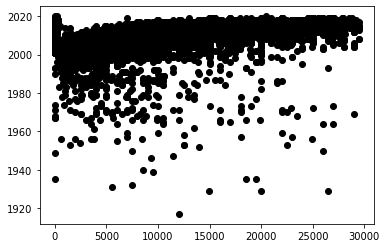

In [45]:
#buat variabel baru fitur yang akan di klustering
# X = np.array(list(zip(data, dataa)))
plt.scatter(data, dataa, c='black') #tampilan data yang belum di klustering

In [0]:
#buat fungsi untuk mengetahui jarak antar titiknya
def distance(c, d, ax=1):
  return np.linalg.norm(c - d, axis=ax)

In [0]:
k = 2 #jumlah kluster sesuai metode elbow yang dihasilkan
#buat centroid dari angka random
x = np.random.randint(0, 30000, size=k) 
y = np.random.randint(0, 2020, size=k)
centroids = np.array(list(zip(x, y)))
print(centroids)

[[6298  458]
 [3842  253]]


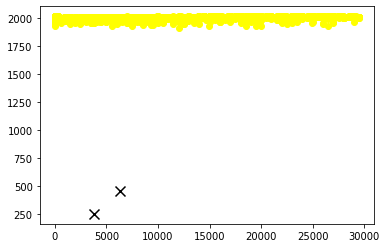

In [34]:
#hasil random centroid
plt.scatter(data, dataa, c='yellow')
plt.scatter(x, y, marker='x', s=100, c='black')

In [0]:
from copy import deepcopy #import library yg dibutuhkan
Clama = np.zeros(centroids.shape) #centroid yang sudah didapat dari random, simpan ke variabel
clt = np.zeros(len(X)) #panjang X simpan di variabel clt
error = distance(centroids, Clama, None) 
while error != 0: #selama variabel error tidak sama dengan nol lakukan looping untuk mencari jarak antar titik ke centroid dan akan mencari centroid terdekatnya
  for i in range(len(X)): #lakukan looping sepanjang panjang X
    temp = distance(X[i], centroids) 
    cluster = np.argmin(temp) #nilai min dari variabel temp simpan divariabel cluster
    clt[i] = cluster
  Clama = deepcopy(centroids) #centroids simpan divariabel Clama
  for i in range(k): #lakukan looping sepanjang k, cari centroid baru dari nilainya
    points = [X[j] for j in range(len(X)) if clt[j] == i]
    centroids[i] = np.mean(points, axis=0)
  error = distance(centroids, Clama, None)

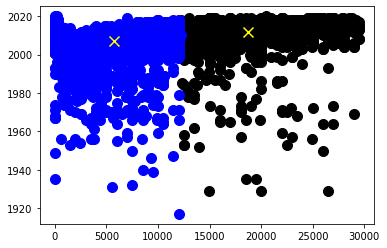

In [37]:
warna = ['black', 'blue', 'red', 'grey', 'pink'] #warna untuk klusternya
fig, ax = plt.subplots() 
for i in range(k): #looping sepanjang k untuk mengetahui tiap klusternya beserta centroidnya
  cent = np.array([X[j] for j in range(len(X)) if clt[j] == i]) 
  ax.scatter(cent[:, 0], cent[:, 1], s=100, c=warna[i]) 
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='yellow')

# kesimpulan

kesimpulan dari proses yang sudah dilakukan yaitu algoritma kmeans ini mudah dipahami, bekerja dengan baik untuk data berskala besar maupun kecil, efisien, dan memiliki performansi yang baik